Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Assuming that the competition data files are located in `data/` folder, we will now load the data to dataframes

In [2]:
data_dir = "data/"
train_competition_input = pd.read_csv(f"{data_dir}/training-input.csv")
train_competition_labels = pd.read_csv(f"{data_dir}/training-labels.csv")
test_competition_input = pd.read_csv(f"{data_dir}/test-input.csv")

Display `train_competition_input` and `train_competition_labels`

In [3]:
display(train_competition_input) # you can also do print(train_competition_input), but display shows pandas dataframes in a nicer format
print(train_competition_labels)  

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


          id    status_group
0      69572      functional
1       8776      functional
2      34310      functional
3      67743  non functional
4      19728      functional
...      ...             ...
59395  60739      functional
59396  27263      functional
59397  37057      functional
59398  31282      functional
59399  26348      functional

[59400 rows x 2 columns]


Let's explore the basic properties of the provided data:

In [4]:
# number of training samples is the number of rows of train_competition_input
n_train_samples = len(train_competition_input.index) 
print(f"#training samples: {n_train_samples}")
assert n_train_samples == len(train_competition_labels)

# number of test samples is the number of rows of test_competition_input
n_test_samples = len(test_competition_input.index)
print(f"#test samples: {n_test_samples}")

# number of input features is the number of columns of train_competition_input
input_features = train_competition_input.columns
n_features = len(input_features)
print(f"\n#features: {n_features}")
print(input_features)

# the number of output classes is the number of unique status_group values in train_competition_labels
output_classes = train_competition_labels["status_group"].unique()
print(f"\n#output classes: {len(output_classes)}")
print(output_classes)

# 
print("\n#training samples per output class:")
print(train_competition_labels["status_group"].value_counts())

#training samples: 59400
#test samples: 14850

#features: 40
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

#output classes: 3
['functional' 'non functional' 'functional needs repair']

#training samples per output class:
status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: 

Now let's look into some numerical input features

#numerical features: 10


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


amount_tsh: missing values? False
amount_tsh: min: 0.00, max: 350000.00, mean: 317.65, std: 2997.57


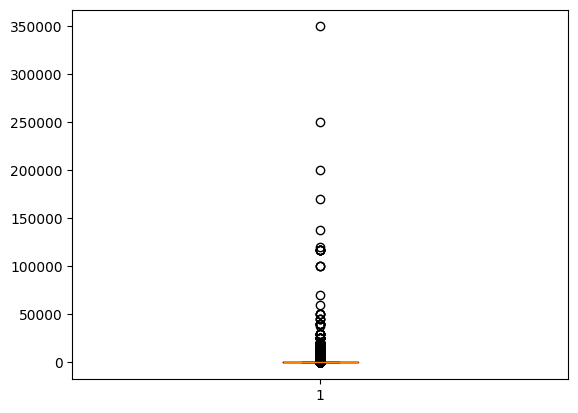

construction_year: missing values? False


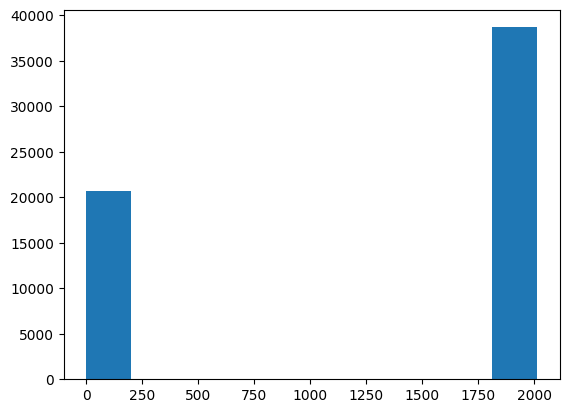

# training samples with construction_year = 0: 20709
# training samples with construction_year > 0: 38691
The smallest non-zero construction_year value: 1960


In [5]:
# select numerical features from train_competition_input
df_num = train_competition_input.select_dtypes(include=["float64", "int64"], exclude=["object"])
n_num_features = len(df_num.columns)
print(f"#numerical features: {n_num_features}")
display(df_num)

# take an example feature: amount_tsh. Let's explore this feature:
feature = "amount_tsh"
# first, let's check if there's any missing value
has_missing_values = df_num[feature].isna().any()
print(f"{feature}: missing values? {has_missing_values}")
# now let's look at some summary statistics
min_val = df_num[feature].min() # min value in the training set
max_val = df_num[feature].max() # max value in the training set
mean_val = df_num[feature].mean() # mean value in the training set
std_val = df_num[feature].std() # standard deviation of the values in the training set
print(f"{feature}: min: {min_val:.2f}, max: {max_val:.2f}, mean: {mean_val:.2f}, std: {std_val:.2f}")
# make a boxplot to see how the values are distributed
plt.boxplot(df_num[feature])
plt.show()

# let try another feature: construction_year
feature = "construction_year"
# first, let's check if there's any missing value
has_missing_values = df_num[feature].isna().any()
print(f"{feature}: missing values? {has_missing_values}")
# make a histogram of the values
vals = df_num[feature].values # this line takes all values of construction_year column, and put them into a 1-d array
plt.hist(vals) # show a histogram of the values
plt.show()
# we see that there are about 20k samples with construction_year = 0, let's confirm that:
print(f"# training samples with construction_year = 0: {(vals == 0).sum()}")
print(f"# training samples with construction_year > 0: {(vals > 0).sum()}")
# now let's find the smallest non-zero construction_year value:
non_zero_rows = df_num[df_num[feature]>0] # get all rows with construction_year > 0
min_non_zero_year = non_zero_rows[feature].min() # get min value from non_zero_rows
print(f"The smallest non-zero construction_year value: {min_non_zero_year}") # result: 1960
# the observations above tell us that construction_year = 0 means "missing values". 


Now let's look into some categorical features

#numerical features: 30


,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,2011-04-11,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


funder: missing values? True


,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
34,2011-02-23,NaN,NaN,Msikitini Wa Ijumaa,Rufiji,Kilombero B,Pwani,Mafia,Baleni,True,...,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
43,2013-01-15,NaN,NaN,Mvae Primary,Internal,Mwarufyu,Singida,Singida Rural,Merya,True,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
47,2011-07-27,NaN,NaN,Mahakamani,Lake Nyasa,Mpandapanda,Mbeya,Rungwe,Kiwira,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
65,2013-02-09,NaN,NaN,Nyambi,Internal,Mfumbu,Singida,Singida Rural,Naintiri,True,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
71,2011-03-31,NaN,NaN,Kwa Manyusi Mlilo,Rufiji,Lembuka,Mbeya,Mbarali,Mawindi,True,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,2013-02-19,NaN,NaN,Shabani,Internal,Mampando A,Singida,Singida Rural,Ntuntu,True,...,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump
59366,2013-02-02,NaN,NaN,Joshoni,Internal,Mungumaho,Singida,Singida Rural,Puma,True,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59370,2013-01-29,NaN,NaN,Village Office,Lake Tanganyika,Mazungwe,Kigoma,Kasulu,Rusesa,True,...,monthly,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other
59376,2013-02-03,NaN,NaN,Nasingo,Internal,Hu,Singida,Singida Rural,Dung'unyi,True,...,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other


funder has 1897 unique values/categories
funder
Abc-ihushi Development Cent       1
Misri Government                  1
Misheni                           1
Misana George                     1
Ministry Of Agricultura           1
                               ... 
World Bank                     1349
Rwssp                          1374
Hesawa                         2202
Danida                         3114
Government Of Tanzania         9084
Length: 1896, dtype: int64


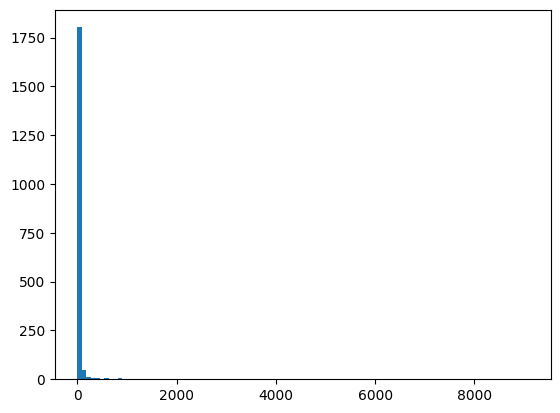

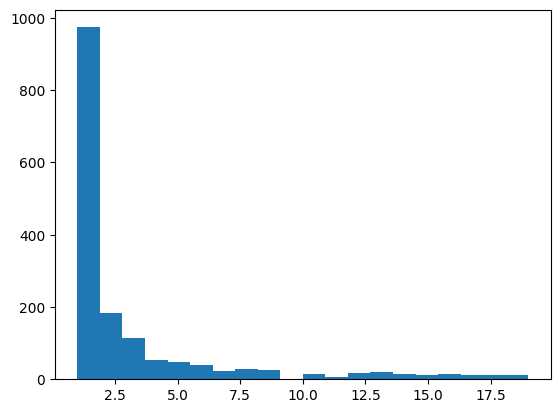

In [6]:
# select categorical features from train_competition_input
df_cat = train_competition_input.select_dtypes(include=["object"], exclude=["int64", "float64"])
n_categorical_features = len(df_cat.columns)
print(f"#categorical features: {n_categorical_features}")
display(df_cat)

# take an example feature: funder. Let's explore this feature:
feature = "funder"
# first, let's check if there's any missing value
has_missing_values = df_cat[feature].isna().any()
print(f"{feature}: missing values? {has_missing_values}")
# there are 3637 rows with missing funder, let show them:
display(df_cat[df_cat[feature].isna()])
# this feature has high-cardinality. We can confirm that by counting how many unique values this feature has in the training set.
n_unique_values = len(df_cat[feature].unique())
print(f"{feature} has {n_unique_values} unique values/categories")
# some values (categories) are actually very infrequent (rare values). Let count many time each value appears in the training set.
counts = df_cat.groupby([feature]).size()
print(counts.sort_values())
# make a histogram of the counts
plt.hist(counts, bins=100)
plt.show()
# apparently there are many values that are infrequent or super rare. Let make another histogram on those particular rare values
threshold = 20
selected_counts = counts[counts<threshold] # select values that appear less than 20 times in the data
plt.hist(selected_counts, bins=threshold)
plt.show()
# as we can see, there are about 1000 values that appear only once in the training set. 
# If there are such values in the test set, it may cause issue with the prediction phase since the training might never see that particular category. 
# in general, it may be beneficial to group all infrequent values into a single category. We will see that in the next lab session.

In the last part of this session, let look at a special feature: date_recorded

In [7]:
# this feature is read as strings by the dataframe. Therefore, by default, they'll be treated as categorical features. But that doesn't really make sense.
print(train_competition_input.select_dtypes(include=["object"], exclude=["int64", "float64"]).columns)

# One example solution is to convert this feature into a numerical feature: the number of days since the first recorded date in the dataset.
train_competition_input["date_recorded"] = pd.to_datetime(train_competition_input.date_recorded, format="%Y-%m-%d")
# find the first recorded date in the training set
first_recorded_date = train_competition_input["date_recorded"].min()
# substract date_recorded column with that first recorded date 
new_dates = train_competition_input["date_recorded"] - first_recorded_date
# convert the new values to the number of days
n_days_since_first = [x.days for x in new_dates]
# replace date_recorded column with the new feature
train_competition_input["date_recorded"] = n_days_since_first
# check data type of the new column (to ensure it's now numeric)
print(train_competition_input["date_recorded"].dtype)

# Apply the same conversion to the test set. However, remember that the first recorded date should be taken from the training set, not the test set.

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')
int64
